In [1]:
# imports
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import math
import os
import pandas as pd
import pickle as pk
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# import de utilities de detectron
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
#Carga del modelo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.99  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [3]:
#Lectura de la imagen
frame = cv2.imread("../pruebas/p.jpeg")
o = predictor(frame)
pkP = o.get("instances").pred_keypoints
if len(pkP)>0:
    x = pkP[0][:,0].cpu().numpy()
    y = pkP[0][:,1].cpu().numpy()

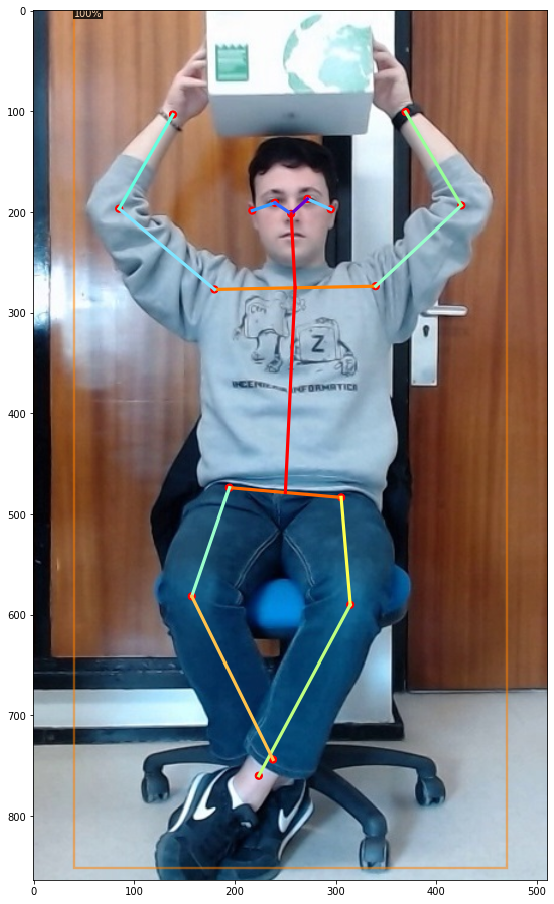

In [4]:
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(o["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

In [4]:
x

array([213.49094, 226.98407, 199.99782, 246.41414, 181.10745, 283.11545,
       150.34314, 354.3591 ,  71.00359, 307.94278, 115.80075, 255.04974,
       162.21709, 262.6059 , 131.45277, 186.5047 , 198.37865],
      dtype=float32)

In [5]:
y

array([169.78755, 157.37067, 160.60986, 166.00851, 167.08824, 229.17273,
       231.87206, 162.76932, 165.46864,  85.02875,  87.18821, 404.08902,
       395.99103, 492.6269 , 485.6086 , 634.07153, 620.57495],
      dtype=float32)

(900, 0)

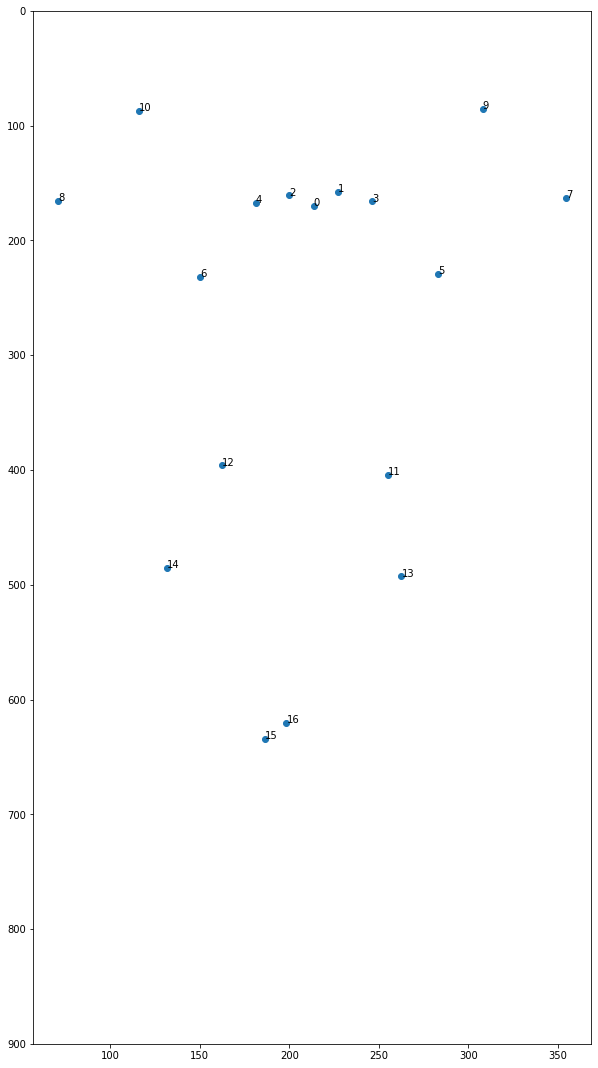

In [6]:
fig, ax = plt.subplots(figsize=(10,19))
ax.scatter(x, y)

for i, txt in enumerate(range(len(x))):
    ax.annotate(i, (x[i], y[i]))
    
plt.ylim(900,0)

In [7]:
x

array([213.49094, 226.98407, 199.99782, 246.41414, 181.10745, 283.11545,
       150.34314, 354.3591 ,  71.00359, 307.94278, 115.80075, 255.04974,
       162.21709, 262.6059 , 131.45277, 186.5047 , 198.37865],
      dtype=float32)

In [8]:
class Posicion():
    
    def __init__(self,x,y):
        self.nariz = [x[0],y[0]]
        self.ojoI = [x[1],y[1]]
        self.ojoD = [x[2],y[2]]
        self.orejaI=[x[3],y[3]]
        self.orejaD=[x[4],y[4]]
        self.hombroI=[x[5],y[5]]
        self.hombroD=[x[6],y[6]]
        self.cuello = self.calcularPuntoMedio(self.hombroI,self.hombroD)
        self.angCuelloSupI = self.calcularAngulo(self.hombroI,self.cuello,self.nariz)
        self.angCuelloSupD = self.calcularAngulo(self.hombroD,self.cuello,self.nariz)
        self.codoI = [x[7],y[7]]
        self.codoD = [x[8],y[8]]
        self.manoI=[x[9],y[9]]
        self.manoD = [x[10],y[10]]
        self.angCodoI = self.calcularAngulo(self.hombroI,self.codoI,self.manoI)
        self.angCodoD = self.calcularAngulo(self.hombroD,self.codoD,self.manoD)
        self.angHombroI = self.calcularAngulo(self.cuello,self.hombroI,self.codoI)
        self.angHombroD = self.calcularAngulo(self.cuello,self.hombroD,self.codoD)
        self.caderaI = [x[11],y[11]]
        self.caderaD = [x[12],y[12]]
        self.cadera = self.calcularPuntoMedio(self.caderaI,self.caderaD)
        self.angCuelloInfI =self.calcularAngulo(self.hombroI,self.cuello,self.cadera)
        self.angCuelloInfD =self.calcularAngulo(self.hombroD,self.cuello,self.cadera)
        self.rodillaI = [x[13],y[13]]
        self.rodillaD = [x[14],y[14]]
        self.angCaderaI = self.calcularAngulo(self.cadera,self.caderaI,self.rodillaI)
        self.angCaderaD = self.calcularAngulo(self.cadera,self.caderaD,self.rodillaD)
        self.tobilloI = [x[15],y[15]]
        self.tobilloD = [x[16],y[16]]
        self.angRodillaI = self.calcularAngulo(self.caderaI,self.rodillaI,self.tobilloI)
        self.angRodillaD = self.calcularAngulo(self.caderaD,self.rodillaD,self.tobilloD)
        self.distAntebrazoI = self.calcularDistancia(self.manoI,self.codoI)
        self.distAntebrazoD = self.calcularDistancia(self.manoD,self.codoD)
        self.distBrazoI = self.calcularDistancia(self.codoI,self.hombroI)
        self.distBrazoD = self.calcularDistancia(self.codoD,self.hombroD)
        self.distCuello = self.calcularDistancia(self.nariz,self.cuello)
        self.distTronco = self.calcularDistancia(self.cuello,self.cadera)
        self.distMusloI = self.calcularDistancia(self.caderaI,self.rodillaI)
        self.distMusloD = self.calcularDistancia(self.caderaD,self.rodillaD)
        self.distPiernaI = self.calcularDistancia(self.rodillaI,self.tobilloI)
        self.distPiernaD = self.calcularDistancia(self.rodillaD,self.tobilloD)
        self.distHombros = self.calcularDistancia(self.hombroI,self.hombroD)
        self.distCadera = self.calcularDistancia(self.caderaI,self.caderaD)
        
    def calcularPuntoMedio(self,p1,p2):
        return [(p1[0]+p2[0])/2,(p1[1]+p2[1])/2]
    
    def calcularAngulo(self,p1,p2,p3):
        v1 = self.calcularVector(p1,p2)
        v2 = self.calcularVector(p3,p2)
        uv1 = v1 / np.linalg.norm(v1)
        uv2 = v2 / np.linalg.norm(v2)
        dp = np.dot(uv1, uv2)
        return math.degrees(np.arccos(dp))
    
    def calcularVector(self,p1,p2):
        return [p2[0]-p1[0],p2[1]-p1[1]]
    
    def calcularDistancia(self,p1,p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [9]:
a = Posicion(x,y)

In [10]:
vc = cv2.VideoCapture('../pruebas/videos-prueba/Videos/Josemi/sentado3-caja.webm')

if (vc.isOpened()==False):
    print("Error")

(grabbed, frame) = vc.read()
pos = [] 
i = 0
while(vc.isOpened()):
    i+=1
    ret,frame = vc.read()
    if ret == True:
        o = predictor(frame)
        pkP = o.get("instances").pred_keypoints
        if len(pkP)>0:
            x = pkP[0][:,0].cpu().numpy()
            y = pkP[0][:,1].cpu().numpy()
        pos.append(Posicion(x,y))
    else:
        break
    print("Frame " + str(i),end="\r")
vc.release()
cv2.destroyAllWindows()